In [2]:
import numpy as np
import pandas as pd

In [3]:
file = pd.read_csv("6_8_10kmer_MIC_table.csv", index_col = 0)

In [4]:
#file['MIC'].value_counts().to_csv('MIC_value_counts.csv')

In [5]:
idx50 = np.load('idx50.npy')
file = file.loc[idx50, :]

In [6]:
len(set(file.loc[idx50, :].index))

50

In [7]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# read in the iris data
#iris = load_iris()

#X = iris.data
#y = iris.target

In [8]:
X = file.iloc[:, :-1]

In [9]:
y = file.iloc[:, -1]

In [10]:
len(X.columns)

559494

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565)

params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 17,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = params.items()

In [12]:
y_test

1
SRR5387288     0.25
SRR5386240     1.00
SRR5386495     1.00
SRR5386812     1.00
SRR5386853     1.00
SRR5386243     8.00
SRR5386041     1.00
SRR5385437     8.00
SRR5385747    16.00
SRR5386794     1.00
Name: MIC, dtype: float64

In [13]:
dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

In [14]:
ans

array([ 8.,  1.,  1.,  1.,  1.,  8.,  1.,  8., 16.,  1.], dtype=float32)

In [26]:
X.index

Index(['SRR5386041', 'SRR5386324', 'SRR5386417', 'SRR5386794', 'SRR5386673',
       'SRR5386974', 'SRR5386086', 'SRR5386495', 'SRR5386104', 'SRR5386027',
       'SRR5386240', 'SRR5386635', 'SRR5385795', 'SRR5385697', 'SRR5386091',
       'SRR5386262', 'SRR5386226', 'SRR5386953', 'SRR5386199', 'SRR5386370',
       'SRR5386306', 'SRR5385632', 'SRR5387399', 'SRR5386644', 'SRR5386853',
       'SRR5386812', 'SRR5386291', 'SRR5385726', 'SRR5386120', 'SRR5385982',
       'SRR5386165', 'SRR5385437', 'SRR5385462', 'SRR5386243', 'SRR5387255',
       'SRR5386289', 'SRR5386035', 'SRR5386354', 'SRR5386185', 'SRR5386286',
       'SRR5386954', 'SRR5387360', 'SRR5387305', 'SRR5385917', 'SRR5385747',
       'SRR5385659', 'SRR5386775', 'SRR5387229', 'SRR5387285', 'SRR5387288'],
      dtype='object', name='1')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=1234565)

In [22]:
X_train = xgb.DMatrix(X)
model.predict(X_train)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8., 16., 16., 16., 16., 16.,  2.,  2.,  1.,  8.],
      dtype=float32)

Accuracy: 90.00 % 


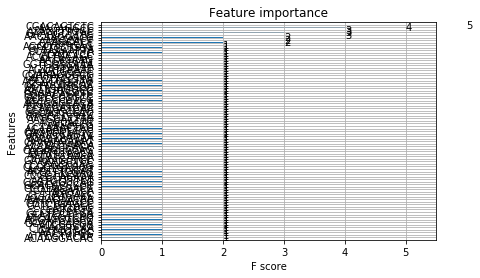

In [13]:
# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()

In [14]:
data2 = sorted(model.get_score().items(), key = lambda item:item[1], reverse = True)

In [15]:
#np.save('6_8_10_kmrs_feat.npy', data2)

In [16]:
np.save('50sample.npy', data2)

In [17]:
import numpy as np
import pandas as pd
data2 = np.load('50sample.npy')
pd.DataFrame(columns = ['kmer', 'f-score'], data=data2).to_csv('50sample.csv', index=None)

In [18]:
data2

array([['CGACAGTCTC', '5'],
       ['AACAGGCC', '4'],
       ['AACAAGGATG', '3'],
       ['GAAAGCTTAC', '3'],
       ['ATAGTTTGGC', '3'],
       ['CTAGGCCC', '2'],
       ['AAAGCACT', '2'],
       ['ACGGCC', '2'],
       ['ACAAGGACAC', '1'],
       ['ATTCGTCCAA', '1'],
       ['AACTGTGG', '1'],
       ['GCTCGGAC', '1'],
       ['CTCACTTCAA', '1'],
       ['ACCCCCCC', '1'],
       ['GCCTCCACGA', '1'],
       ['AGGATGTGCC', '1'],
       ['ATCACCGCAG', '1'],
       ['CTATCGTCAG', '1'],
       ['GCCTCCCTGA', '1'],
       ['CCGTGCTC', '1'],
       ['ATGTGG', '1'],
       ['GATCGTTACC', '1'],
       ['CCTCTGAGCC', '1'],
       ['CATAGAATCC', '1'],
       ['AGCCCCGCAA', '1'],
       ['CCTTATGACC', '1'],
       ['AGCCGC', '1'],
       ['TCATAGATCA', '1'],
       ['CCGTAGGACC', '1'],
       ['GCACGCCCCC', '1'],
       ['CGGTGGCCAG', '1'],
       ['AATCTTTTCT', '1'],
       ['CCCACAAA', '1'],
       ['CCGGTGCCCC', '1'],
       ['ATCCTTCGAG', '1'],
       ['ACATCTGGAT', '1'],
       ['CCGCTGAGCG'